tvec: [ 0.4166052   0.59533029  0.81280355  3.57187409  3.83640376  4.00698526
  4.23431932  4.65401014  4.67501165  5.52728502  5.89002217  6.33278422
  7.59289011  7.61157223  9.61957947 10.36558969 11.56025642 12.10422892
 15.85251117 16.07558609]
xvec: [0 1 0 1 2 0 1 2 1 2 0 2 0 2 0 2 0 1 2 1]


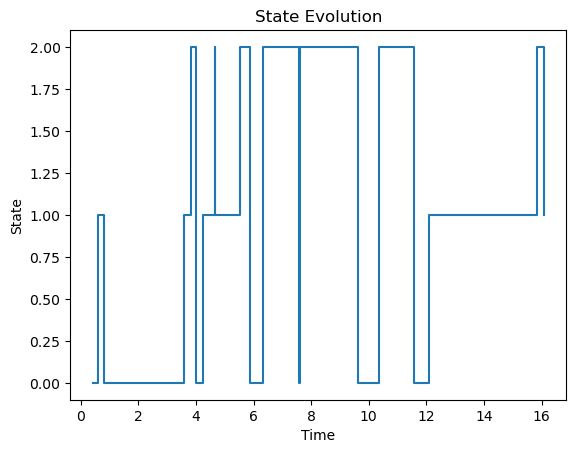

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def rcfmc(n, Q, pi0):
    xvec = np.zeros(n + 1, dtype=int)
    tvec = np.zeros(n)
    r = len(pi0)
    x = np.random.choice(r, p=pi0)
    t = 0
    xvec[0] = x

    for i in range(n):
        t += np.random.exponential(-Q[x, x])
        weights = Q[x, :].copy()#creates a copy of the row in the transition matrix Q corresponding to the current state x
        weights[x] = 0
        weights /= np.sum(weights)  # Normalize the weights
        x = np.random.choice(r, p=weights)
        xvec[i+1] = x
        tvec[i] = t

    return tvec, xvec[:-1]  # Exclude the last element of xvec

# Define the transition matrix and initial probabilities
Q = np.array([[-0.8, 0.5, 0.3],
              [0.4, -0.9, 0.5],
              [0.3, 0.2, -0.5]])
pi0 = np.array([0.3, 0.4, 0.3])
# Generate the data using rcfmc

n = 20
tvec, xvec = rcfmc(n, Q, pi0)
print("tvec:", tvec)
print("xvec:", xvec)

# Plot the results
plt.step(tvec, xvec, where='post')
plt.xlabel('Time')
plt.ylabel('State')
plt.title('State Evolution')
plt.show()

